In [1]:
#! pip3 install tensorflow
#! pip3 install keras
#! pip3 install pandas
#! pip3 install scikit-learn
#! pip3 install matplotlib
#! pip3 install numpy
#! pip3 install seaborn

In [2]:
# import libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data_set = pd.read_csv('data/NSE-TATAGLOBAL.csv')
print('data_set.shape: ',data_set.shape)
data_set

data_set.shape:  (2035, 8)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


<Axes: >

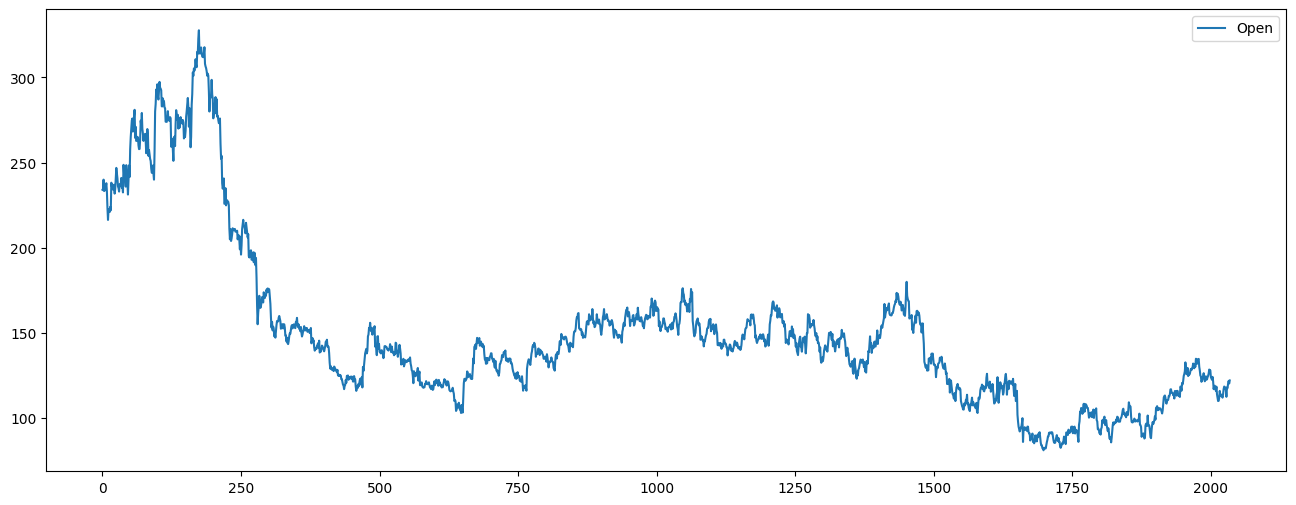

In [4]:
# plot the data
data_set['Open'].plot(figsize=(16,6), legend=True)


In [5]:
train_set = data_set.iloc[:, 1:2].values
print(train_set)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)
train_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [7]:
len(train_set_scaled)

2035

In [8]:
window_size = 60
x_train = []
y_train = []
for i in range(window_size, len(train_set_scaled)):
    x_train.append(train_set_scaled[i-window_size:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
print(x_train)
x_train.shape

[[0.6202352  0.62226277 0.64436334 ... 0.79622871 0.81062449 0.74371452]
 [0.62226277 0.64436334 0.61719384 ... 0.81062449 0.74371452 0.77007299]
 [0.64436334 0.61719384 0.61820762 ... 0.74371452 0.77007299 0.73641525]
 ...
 [0.19870235 0.21796431 0.21553122 ... 0.14963504 0.14801298 0.15815085]
 [0.21796431 0.21553122 0.20600162 ... 0.14801298 0.15815085 0.16504461]
 [0.21553122 0.20600162 0.21654501 ... 0.15815085 0.16504461 0.15896188]]


(1975, 60)

In [10]:
x_train[0:window_size]

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.79622871, 0.81062449, 0.74371452, ..., 0.78223844, 0.78223844,
        0.78183293],
       [0.81062449, 0.74371452, 0.77007299, ..., 0.78223844, 0.78183293,
        0.79075426],
       [0.74371452, 0.77007299, 0.73641525, ..., 0.78183293, 0.79075426,
        0.80738037]])

In [11]:
# Convert x_train to 3D
# x_train.shape = (1975, 60): which means 1975 rows and 60 columns
# we are reshaping it to (1975, 60, 1): which means 1975 rows, of 60 rows x 1 column 3D array
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [12]:
x_train[0]

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       [0.61719384],
       [0.61820762],
       [0.62408759],
       [0.62793998],
       [0.63584753],
       [0.61658556],
       [0.57725061],
       [0.54845904],
       [0.57339822],
       [0.57339822],
       [0.56731549],
       [0.57948094],
       [0.57137064],
       [0.63706407],
       [0.62814274],
       [0.63219789],
       [0.62550689],
       [0.61942417],
       [0.63219789],
       [0.61111111],
       [0.62206002],
       [0.64557989],
       [0.67234388],
       [0.66058394],
       [0.64760746],
       [0.6283455 ],
       [0.62408759],
       [0.61597729],
       [0.63341444],
       [0.63077859],
       [0.63321168],
       [0.64841849],
       [0.62469586],
       [0.62814274],
       [0.61394972],
       [0.67964315],
       [0.65815085],
       [0.6593674 ],
       [0.64841849],
       [0.62773723],
       [0.67883212],
       [0.66058394],
       [0.63990268],
       [0.60888078],
       [0.643

In [13]:
# Build the LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout    

In [14]:
# crete the architecture
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(window_size, 1)))
model.add(Dropout(0.2))

# layer #2
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# layer #3
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# layer #4
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [15]:
#model.compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# run the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
62/62 [==============================] - 7s 106ms/step - loss: 0.0017
Epoch 2/50
62/62 [==============================] - 6s 96ms/step - loss: 0.0017
Epoch 3/50
62/62 [==============================] - 7s 107ms/step - loss: 0.0018
Epoch 4/50
62/62 [==============================] - 7s 108ms/step - loss: 0.0021
Epoch 5/50
62/62 [==============================] - 6s 96ms/step - loss: 0.0016
Epoch 6/50
62/62 [==============================] - 6s 91ms/step - loss: 0.0015
Epoch 7/50
62/62 [==============================] - 6s 95ms/step - loss: 0.0014
Epoch 8/50
62/62 [==============================] - 6s 102ms/step - loss: 0.0015
Epoch 9/50
62/62 [==============================] - 6s 104ms/step - loss: 0.0016
Epoch 10/50
62/62 [==============================] - 7s 109ms/step - loss: 0.0015
Epoch 11/50
62/62 [==============================] - 7s 119ms/step - loss: 0.0014
Epoch 12/50
62/62 [==============================] - 7s 117ms/step - loss: 0.0013
Epoch 13/50
62/62 [==========

In [76]:
model.save('stock_price_prediction.h5')

In [77]:
dataset_test = pd.read_csv('data/tatatest.csv')

In [78]:
data_set.head(10)
test_set = dataset_test.iloc[:, 1:2].values

In [79]:
dataset_total = pd.concat((data_set['Open'], dataset_test['Open']), axis=0)

In [80]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - window_size:].values    
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(window_size, len(inputs)):
    x_test.append(inputs[i-window_size:i, 0])
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [81]:
inputs

array([[0.20600162],
       [0.21654501],
       [0.21654501],
       [0.2175588 ],
       [0.19870235],
       [0.19018654],
       [0.17802109],
       [0.175588  ],
       [0.16301703],
       [0.16707218],
       [0.17112733],
       [0.17639903],
       [0.18349554],
       [0.1717356 ],
       [0.16423358],
       [0.16991079],
       [0.17619627],
       [0.16788321],
       [0.16909976],
       [0.17396594],
       [0.17741281],
       [0.18268451],
       [0.19221411],
       [0.18896999],
       [0.19018654],
       [0.17396594],
       [0.17092457],
       [0.16788321],
       [0.17477697],
       [0.16443633],
       [0.14557989],
       [0.15287916],
       [0.15369019],
       [0.15044607],
       [0.14152474],
       [0.15145985],
       [0.13341444],
       [0.12530414],
       [0.11719384],
       [0.11780211],
       [0.12489862],
       [0.14132198],
       [0.13098135],
       [0.12935929],
       [0.13240065],
       [0.12895377],
       [0.12530414],
       [0.133

In [82]:
x_test.shape

(16, 60, 1)

In [83]:
# do the prediction
predicted_stock_price = model.predict(x_test)
# inverse the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 50ms/step


In [84]:
predicted_stock_price

array([[120.49578],
       [148.74431],
       [190.13687],
       [219.19221],
       [229.6936 ],
       [231.88513],
       [231.37224],
       [228.5105 ],
       [225.07521],
       [219.726  ],
       [215.55617],
       [214.14377],
       [212.2927 ],
       [213.12459],
       [217.34325],
       [223.47823]], dtype=float32)

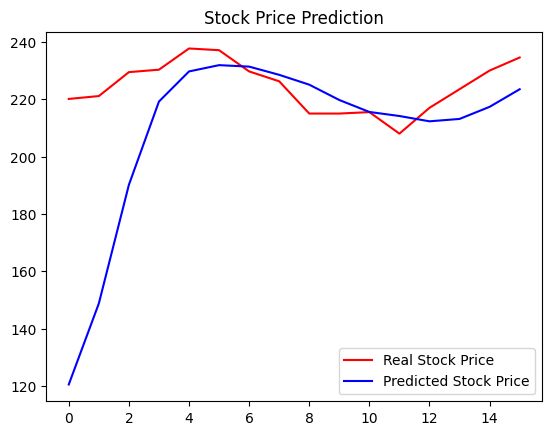

In [85]:
# visualizer the results
plt.plot(test_set,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()